In [18]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

dash = pd.read_csv('/home/ml/datasets/DASH60_with_indicators.csv',delimiter=',')
dash.head()

,Date_Time,Open,Max,Min,Close,Volume,SMA14,SMA30,EMA14,EMA30,...,BB_Upper,EMA_12,EMA_26,MACD,RSI,TR.1,ATR,PSAR,Pct_Change,Direction
0,2017-09-08 14:00:00,335.93,335.93,293.66,322.16,274,329.045000,329.045000,328.553214,328.815500,...,556.947644,328.471250,328.780192,-0.308942,11.046512,42.27,41.508571,362.790000,-0.040991,-1.0
1,2017-09-08 15:00:00,322.16,326.39,307.20,323.87,241,327.320000,327.320000,326.764211,327.055920,...,502.991247,326.675381,327.016008,-0.340627,40.078329,24.17,34.885178,362.790000,0.005308,1.0
2,2017-09-08 16:00:00,324.00,335.90,324.00,331.37,137,328.332500,328.332500,328.173251,328.244606,...,479.395780,328.157289,328.233194,-0.075905,27.394408,15.17,28.853749,360.024800,0.023157,1.0
3,2017-09-08 17:00:00,331.37,331.54,320.73,320.73,121,326.812000,326.812000,326.231319,326.534851,...,479.939402,326.139321,326.493172,-0.353851,26.812227,11.54,24.336618,357.370208,-0.032109,-1.0
4,2017-09-08 18:00:00,320.73,326.43,320.00,320.00,77,325.676667,325.676667,324.789503,325.256411,...,477.319026,324.647143,325.192642,-0.545499,25.456053,8.26,20.616776,354.821800,-0.002276,-1.0


In [19]:
dash.columns[1:30]

Index(['Open', 'Max', 'Min', 'Close', 'Volume', 'SMA14', 'SMA30', 'EMA14',
       'EMA30', 'Privot_Dot', 'Diff', 'TR', 'R1', 'R2', 'R3', 'S1', 'S2', 'S3',
       'BB_Lower', 'BB_Mean', 'BB_Upper', 'EMA_12', 'EMA_26', 'MACD', 'RSI',
       'TR.1', 'ATR', 'PSAR', 'Pct_Change'],
      dtype='object')

In [22]:
n_train = (dash['Date_Time'].count()*0.7).astype(int)

X = dash[dash.columns[1:29]]
y = dash['Direction']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

In [46]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [47]:
print("Genauigkeit auf den Trainingsdaten: {:.3f}".format(tree.score(X_train, y_train)))
print("Genauigkeit auf den Testdaten: {:.3f}".format(tree.score(X_test, y_test)))

Genauigkeit auf den Trainingsdaten: 0.637
Genauigkeit auf den Testdaten: 0.569


In [48]:
print(np.unique(dash.Direction))

[-1.  0.  1.]


In [49]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["-1", "0", "1"], feature_names=dash.columns[1:29], impurity=False, filled=True)


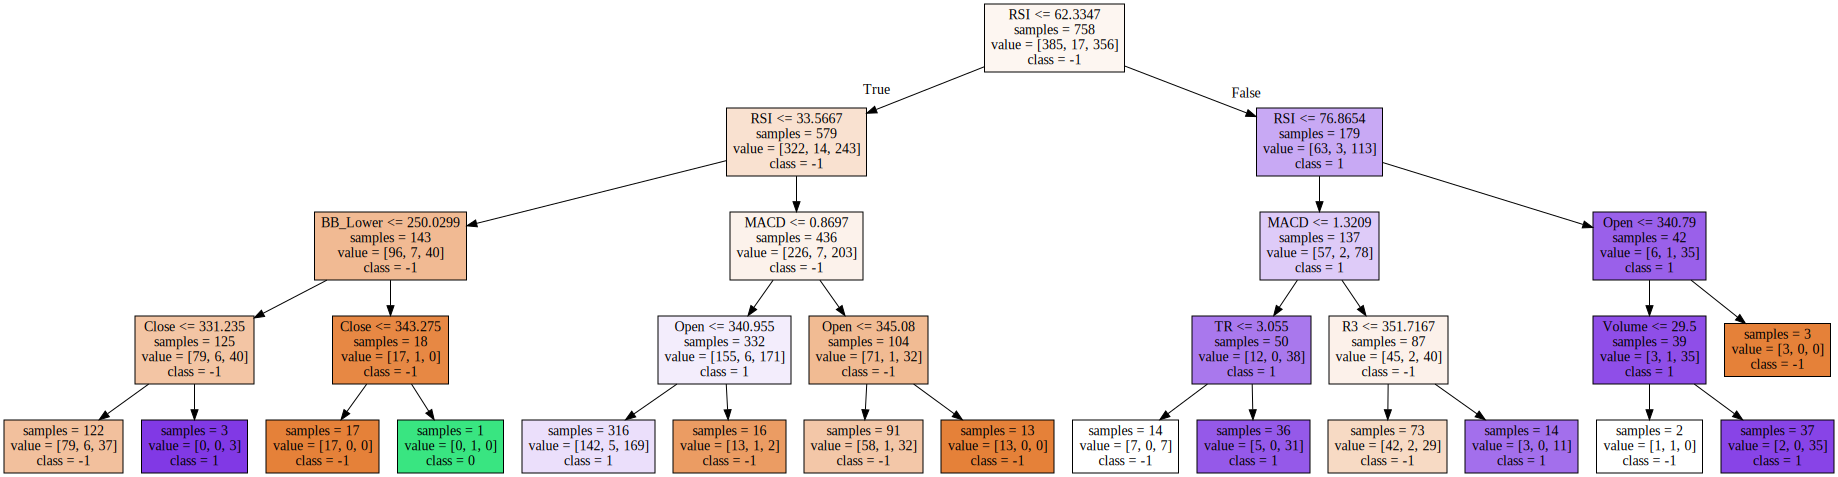

In [50]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)